In [1]:
import os
os.chdir('../')

In [2]:
import data
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_df = data.train_df('full')
test_df = data.test_df('full')
print(train_df.shape)
print(test_df.shape)

Loading full train_df, it will take a while..


/Users/federico/miniconda3/envs/recsys/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(5093949, 13)
(1437504, 13)


## Let's analyse the sessions available in train.csv and test.csv

In [4]:
train_sessions_df = train_df[['session_id','user_id']].groupby('session_id').count()
test_sessions_df = test_df[['session_id','user_id']].groupby('session_id').count()

In [5]:
train_sessions_df.head(10)

,user_id
session_id,
00000510f1adc,1
00003f3b20954,1
000056cd97ce2,3
000066611146f,3
00008c1f39c46,3
0000be39860d7,7
0000c0fb51e11,3
0000c8490c155,2
0000d4284ff9b,3


In [6]:
train_lengths = train_sessions_df.user_id.values
test_lengths = test_sessions_df.user_id.values

In [7]:
print('TRAIN')
print('Number of users:', train_df.user_id.nunique())
print('Number of sessions:', train_sessions_df.shape[0])
print()
print('Session lengths statistics:')
print('- average:', round(train_lengths.mean(),3))
print('- min:', train_lengths.min())
print('- max:', train_lengths.max())
print('- std:', round(train_lengths.std(),3))
print('- median:', np.median(train_lengths))
print('- 70 percentile:', np.percentile(train_lengths, 70))
print('- 80 percentile:', np.percentile(train_lengths, 80))
print('- 90 percentile:', np.percentile(train_lengths, 90))
print('- 95 percentile:', np.percentile(train_lengths, 95))
print()
print()
print('TEST')
print('Number of users:', test_df.user_id.nunique())
print('Number of sessions:', test_sessions_df.shape[0])
print()
print('Session lengths statistics:')
print('- average:', round(test_lengths.mean(),3))
print('- min:', test_lengths.min())
print('- max:', test_lengths.max())
print('- std:', round(test_lengths.std(),3))
print('- median:', np.median(test_lengths))
print('- 70 percentile:', np.percentile(test_lengths, 70))
print('- 80 percentile:', np.percentile(test_lengths, 80))
print('- 90 percentile:', np.percentile(test_lengths, 90))
print('- 95 percentile:', np.percentile(test_lengths, 95))

TRAIN
Number of users: 730804
Number of sessions: 910733

Session lengths statistics:
- average: 5.593
- min: 1
- max: 899
- std: 8.791
- median: 3.0
- 70 percentile: 5.0
- 80 percentile: 8.0
- 90 percentile: 12.0
- 95 percentile: 19.0


TEST
Number of users: 250852
Number of sessions: 289396

Session lengths statistics:
- average: 4.967
- min: 1
- max: 627
- std: 7.299
- median: 3.0
- 70 percentile: 5.0
- 80 percentile: 7.0
- 90 percentile: 11.0
- 95 percentile: 16.0


### Sessions lengths (log-scaled x axis)

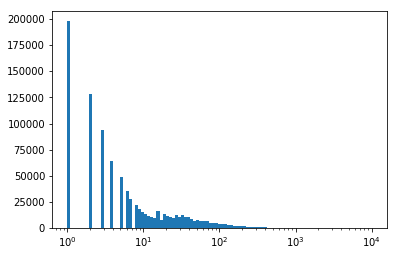

In [39]:
plt.hist(train_lengths, bins=np.logspace(0, 4, 100))
plt.gca().set_xscale('log')
plt.show()

In [20]:
print('Percentage of sessions of length 1:', round(train_lengths[train_lengths == 1].shape[0] / train_sessions_df.shape[0],3))

Percentage of sessions of length 1: 0.218


In [21]:
print('Percentage of sessions of length 2:', round(train_lengths[train_lengths == 2].shape[0] / train_sessions_df.shape[0],3))

Percentage of sessions of length 2: 0.141


In [22]:
print('Percentage of sessions of length 3:', round(train_lengths[train_lengths == 3].shape[0] / train_sessions_df.shape[0],3))

Percentage of sessions of length 3: 0.103
